In [104]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
x_data = pd.read_csv("/Users/karunparashar/Downloads/New Folder With Items/coursework/home_work_assignments/DIC/Assignment1/data.csv")
y_t = x_data.iloc[:,48]
x_train, x_test, y_train, y_test = train_test_split(x_t,y_t,train_size=0.8,test_size=0.2,
                                                    random_state = 7)

### This step performs standard scaling on the training and testing data

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train.values), columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(sc.fit_transform(x_test.values), columns=x_test.columns, index=x_test.index)

### Support vector classifier with default values

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svcc =SVC(gamma = 'auto')
svcc_model = svcc.fit(x_train,y_train)
svc_res = svcc_model.predict(x_test)
svc_accuracy = accuracy_score(svc_res,y_test)
print("Support vector classifier accuracy = ",svc_accuracy*100)

Support vector classifier accuracy =  96.44775390625


### KNN classifier with number of neighbors = 5

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc_fit = knc.fit(x_train,y_train)
k_res = knc_fit.predict(x_test) 
knn_accuracy = accuracy_score(k_res,y_test)
print("KNN accuracy = ",knn_accuracy*100)

KNN accuracy =  80.21240234375


### Logistic regression classifier with default values
(we can increase number of iterations if we get a ConvergenceWarning)

In [108]:
from sklearn.linear_model import LogisticRegressionCV
lgrv = LogisticRegressionCV(multi_class = 'auto', cv = 5,max_iter=1000)
log_mod = lgrv.fit(x_train,y_train)
log_res = log_mod.predict(x_test)
log_acc = accuracy_score(y_test, log_res)
print("logistic regression accuracy for 1000 iterations = ",log_acc*100)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


logistic regression accuracy for 1000 iterations =  87.21923828125


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Decision tree classifier with default values

In [111]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dt_mod = dtc.fit(x_train,y_train)
dt_res = dt_mod.predict(x_test)
dt_acc = accuracy_score(y_test, dt_res)
print("Decision tree classifier accuracy = ",dt_acc*100)

Decision tree classifier accuracy =  90.44189453125


### Voting classifier using all above classifiers

In [112]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('SVC', svcc),('Logistic', lgrv),('Decision', dtc),('KNN',knc)],
                 voting='hard')
vc_fit = vc.fit(x_train,y_train)
vc_res = vc_fit.predict(x_test)
vc_acc =accuracy_score(y_test, vc_res, normalize=True, sample_weight=None)
print("Voting classifier or ensemble classifier accuracy = ",vc_acc*100)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//ana

Voting classifier or ensemble classifier accuracy =  95.98388671875


### Randomised grid search- because grid search is slower

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
import numpy as np
import random

param_dist_dtc = { "max_features": range(1, 9)}
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],}  
param_grid_knn = {'n_neighbors':random.sample(range(1, 20), 3)}

grid_dtc = RandomizedSearchCV(dtc, param_dist_dtc, cv = 2,verbose = 3,n_jobs=1)
grid_svc = RandomizedSearchCV(svcc, param_grid_svc,cv =2, verbose = 3,n_jobs=1)
grid_knn = RandomizedSearchCV(knc, param_grid_knn,cv =2, verbose = 3,n_jobs=1)

dtc_model = grid_dtc.fit(x_train, y_train)
svc_model = grid_svc.fit(x_train, y_train)
knn_model = grid_knn.fit(x_train, y_train)

grid_predictions_dtc = dtc_model.predict(x_test) 
grid_predictions_svc = svc_model.predict(x_test)
grid_predictions_knn = knn_model.predict(x_test)

dtc_acc_grid = accuracy_score(y_test,grid_predictions_dtc)
svc_acc_grid = accuracy_score(y_test,grid_predictions_svc)
knn_acc_grid = accuracy_score(y_test,grid_predictions_knn)

print("grid based Decision tree accuracy",dtc_acc_grid*100)
print("grid based SVC accuracy",svc_acc_grid*100,"-5 minutes with C as hyperparameter")
print("grid based KNN accuracy",knn_acc_grid*100)

Plotting hyper-parameters vs mean accuracy

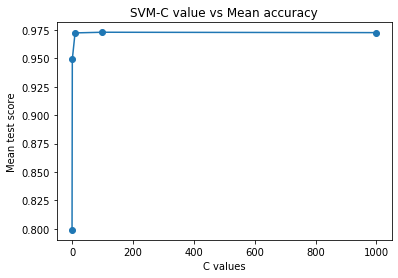

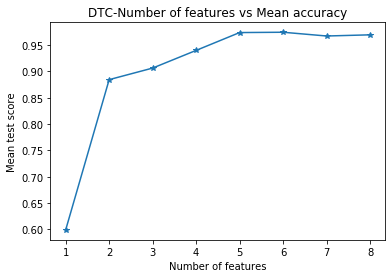

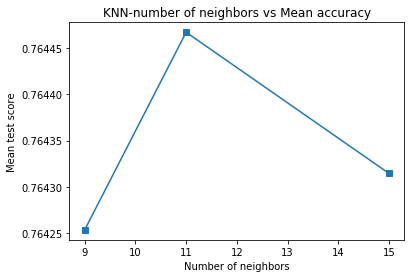

In [160]:
import matplotlib.pyplot as plt
#Plotting accuracy vs parameter selection(we can also plot other parameters with C-V results

svc_grid_results =grid_svc.cv_results_
plt.plot(np.array([0.1, 1, 10, 100, 1000]),svc_grid_results['mean_test_score'],marker='o')
plt.title('SVM-C value vs Mean accuracy')
plt.xlabel('C values') 
plt.ylabel('Mean test score') 
plt.show()

decision_tree_grid_results =grid_dtc.cv_results_
plt.plot(np.array([1,2,3,4,5,6,7,8]),decision_tree_grid_results['mean_test_score'],marker='*')
plt.title('DTC-Number of features vs Mean accuracy')
plt.xlabel('Number of features') 
plt.ylabel('Mean test score') 
plt.show()

KNN_grid_results =grid_knn.cv_results_
plt.plot(np.array([9,11,15]),KNN_grid_results['mean_test_score'],marker='s')
plt.title('KNN-number of neighbors vs Mean accuracy')
plt.xlabel('Number of neighbors') 
plt.ylabel('Mean test score') 
plt.show()

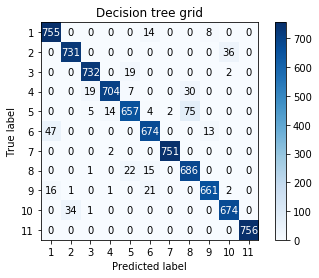

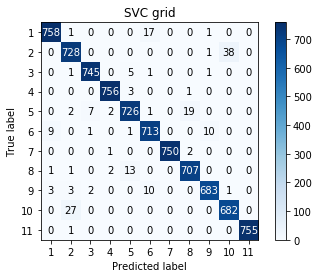

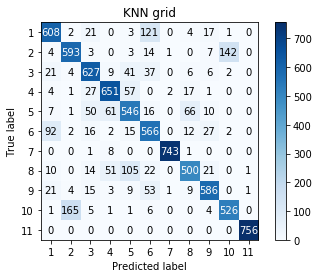

In [186]:
# Confusion matrix usings sci-kit plot
import scikitplot as skplt #might be required to pip install it
list_of_grid_predictions = [grid_predictions_dtc,grid_predictions_svc,grid_predictions_knn]
names_pred = ["Decision tree grid","SVC grid","KNN grid"]
for i in range(len(list_of_grid_predictions)):
    skplt.metrics.plot_confusion_matrix(y_test,list_of_grid_predictions[i],title =names_pred[i])

Text(0.5, 1.0, 'voting')

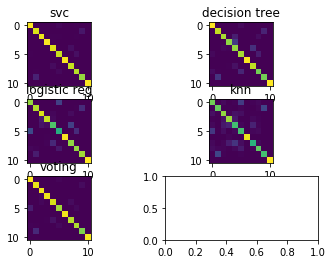

In [243]:
#plotting confusion matrix using subplots
from matplotlib import gridspec
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, svc_res)
cf_d = confusion_matrix(y_test, dt_res)
cf_log = confusion_matrix(y_test, log_res)
cf_knn = confusion_matrix(y_test, k_res)
cf_vc = confusion_matrix(y_test, vc_res)
from matplotlib.pyplot import subplots
fig, axs = plt.subplots(3, 2)
axs[0, 0].imshow(cf)
axs[0, 0].set_title('svc')
axs[0, 1].imshow(cf_d)
axs[0, 1].set_title('decision tree')
axs[1, 0].imshow(cf_log)
axs[1, 0].set_title('logistic reg')
axs[1, 1].imshow(cf_knn)
axs[1, 1].set_title('knn')
axs[2, 0].imshow(cf_vc)
axs[2, 0].set_title('voting')
